In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'] = df['Category'].map({'ham': 0, 'spam': 1})
df.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z]', '', text)
  words = text.split()
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]
  stemmer = PorterStemmer()
  words = [stemmer.stem(word) for word in words]
  return ''.join(words)

df['cleaned'] = df['Message'].apply(clean_text)

#df.head()

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label']

Naive Bayes :               precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       1.00      0.03      0.05       149

    accuracy                           0.87      1115
   macro avg       0.93      0.51      0.49      1115
weighted avg       0.89      0.87      0.81      1115



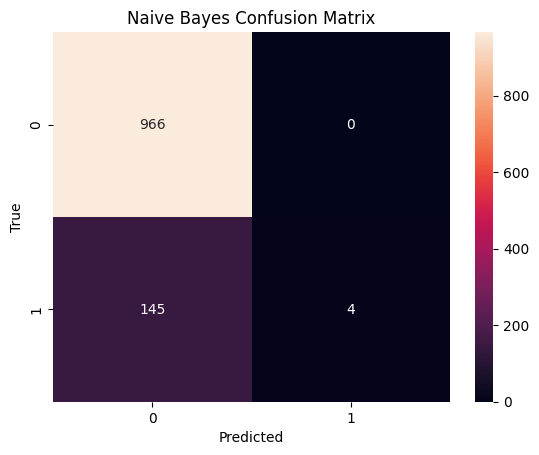

Logistic Regression :               precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       1.00      0.03      0.05       149

    accuracy                           0.87      1115
   macro avg       0.93      0.51      0.49      1115
weighted avg       0.89      0.87      0.81      1115



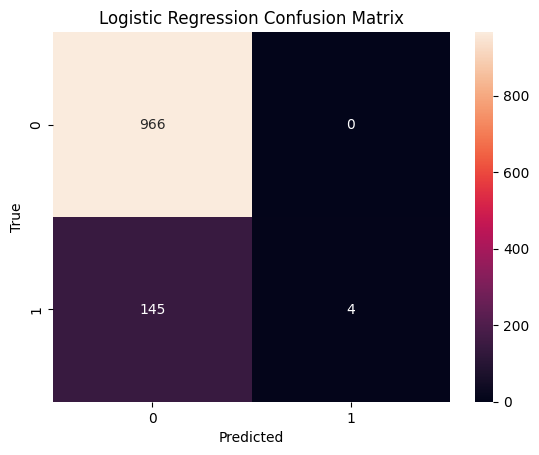

SVM :               precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.34      0.50       149

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



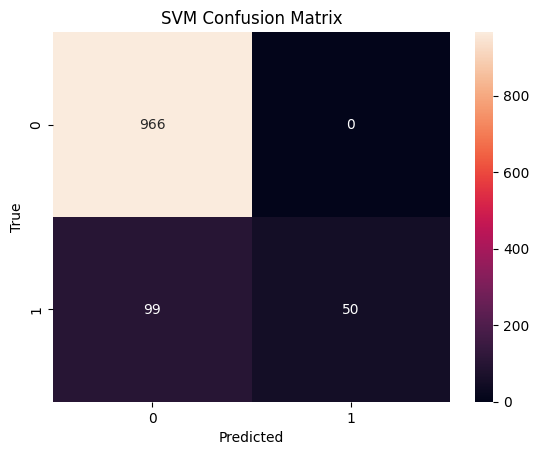

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
'Naive Bayes': MultinomialNB(),
'Logistic Regression': LogisticRegression(max_iter=1000),
'SVM': LinearSVC()
}

for name , model in models.items():
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  print(f'{name} : {classification_report(y_test, preds)}')
  cm = confusion_matrix(y_test, preds)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.title(f'{name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()



In [ ]:
def classify_email(email_text):
  cleaned_text = clean_text(email_text)
  transformed_text = vectorizer.transform([cleaned_text])
  prediction = models['SVM'].predict(transformed_text)
  return 'spam' if prediction[0] == 1 else 'ham'

while True:
  user_input = input("Enter an email message (or type 'exit' to quit): ")
  if user_input.lower() == 'exit':
    break
  result = classify_email(user_input)
  print(f"\n Prediction: {result}\n")

Enter an email message (or type 'exit' to quit): GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm

 Prediction: spam

Enter an email message (or type 'exit' to quit): I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the one to play jokes...

 Prediction: ham

Enter an email message (or type 'exit' to quit): exit
